In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from importlib import reload
from dm_control import suite

from environments.observation_domains import estimate_domains
import environments
from environments import point
from environments import reacher_explore
from environments import hallway
from environments import ball_in_cup_explore
from environments import manipulator_explore

import utils

In [32]:
def render(physics, camera_id=None, height=480, width=480, **kwargs):
    args = {'height': height, 'width': width, **kwargs}
    if camera_id is not None:
        args['camera_id'] = camera_id
    img = physics.render(**args)
    plt.figure(figsize = (10,10))
    plt.imshow(img)

[-0.17417072  0.07462013  4.86084214]
[-0.17417072  0.07462014 -0.7575977   0.6527218 ]


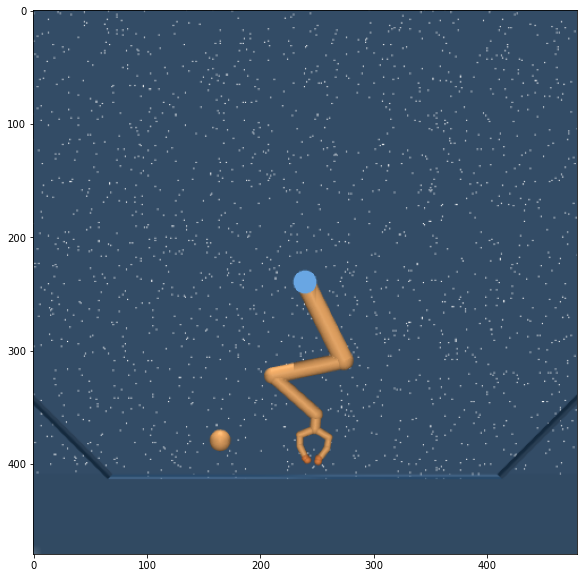

In [131]:
reload(manipulator_explore)
env = suite.load('manipulator_explore', 'reach_lift_ball')
timestep = env.reset()
flat_obs = utils.flatten_observation(timestep.observation)
print(env.physics.named.data.qpos[env.task._object_joints])
print(select_observations(env.observation_spec(), {'object_pos'}, flat_obs))
render(env.physics, camera_id='fixed')

In [96]:
timestep

TimeStep(step_type=<StepType.FIRST: 0>, reward=None, discount=None, observation=OrderedDict([('arm_pos', array([[ 0.60482167,  0.79636094],
       [ 0.98922897, -0.14637639],
       [ 0.82474488,  0.56550498],
       [-0.95605206, -0.29319695],
       [ 0.14091377,  0.99002187],
       [ 0.10131159,  0.99485474],
       [ 0.14091377,  0.99002187],
       [-0.19557898,  0.98068795]])), ('arm_vel', array([0., 0., 0., 0., 0., 0., 0., 0.])), ('touch', array([0., 0., 0., 0., 0.])), ('hand_pos', array([-0.1904565 ,  0.31839724,  0.7422906 , -0.6700781 ])), ('object_pos', array([ 0.40197701,  0.03605238, -0.99962757,  0.02728961])), ('object_vel', array([0.77550386, 0.        , 0.        ]))]))

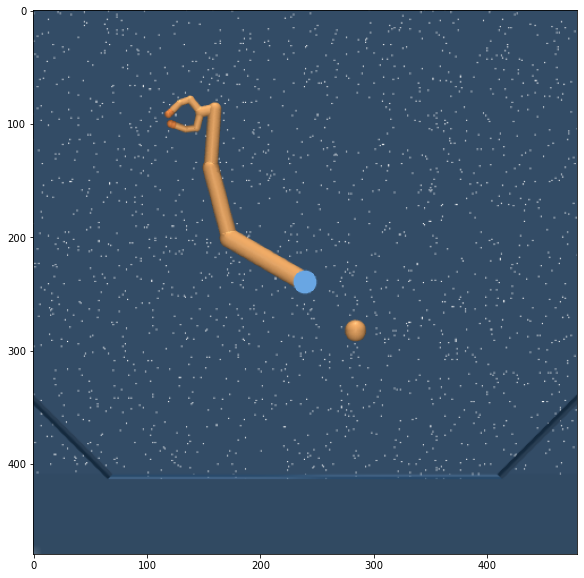

In [66]:
# with env.physics.reset_context():
env.physics.named.data.qpos[env.task._object_joints[1]] = 0.3
env.physics.after_reset()
render(env.physics, camera_id='fixed')

In [67]:
env.step(np.zeros(env.action_spec().shape))

TimeStep(step_type=<StepType.MID: 1>, reward=array([0.9]), discount=1.0, observation=OrderedDict([('arm_pos', array([[ 0.86518794,  0.50144773],
       [-0.70957446,  0.70463046],
       [-0.32042679,  0.94727328],
       [ 0.95944578, -0.28189325],
       [ 0.5352504 ,  0.84469344],
       [ 0.03420977,  0.99941467],
       [ 0.53529981,  0.84466213],
       [-0.01670341,  0.99986049]])), ('arm_vel', array([ 0.12357215, -0.00707046, -0.0094742 ,  0.02324631, -0.0030023 ,
       -0.03416603,  0.00329243,  0.01663664])), ('touch', array([0., 0., 0., 0., 0.])), ('hand_pos', array([-0.18546816,  0.75505807,  0.62668294, -0.77927434])), ('object_pos', array([ 1.05945145e-01,  2.99460450e-01, -9.99999998e-01,  6.20654294e-05])), ('object_vel', array([ 2.24005085e-01, -9.81000000e-02,  2.35423353e-17]))]))

[-0.25104188  0.73926524]


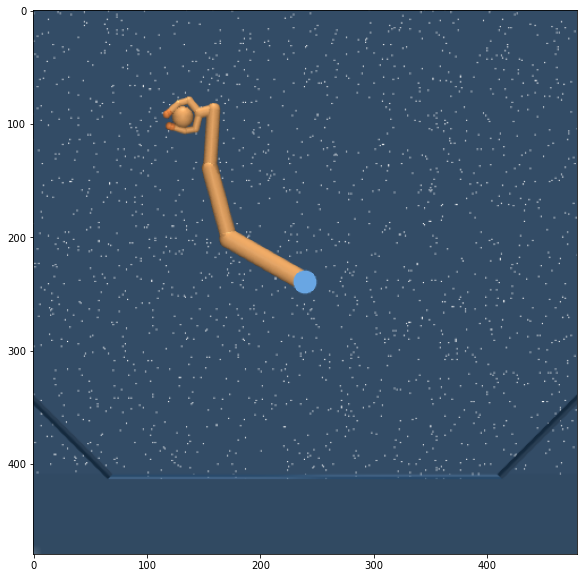

In [88]:
env.physics.named.data.qpos[env.task._object_joints[:2]] = env.physics.named.data.site_xpos['grasp', 'x'], env.physics.named.data.site_xpos['grasp', 'z']
env.physics.after_reset()
print(env.physics.named.data.qpos[env.task._object_joints[:2]])
render(env.physics, camera_id='fixed')

In [92]:
timestep = env.step(np.zeros(env.action_spec().shape))
flat_obs = utils.flatten_observation(timestep.observation)
select_observations(env.observation_spec(), {'object_pos'}, flat_obs)[[0, 1]]

DeviceArray([-0.2522675,  0.7374886], dtype=float32)

In [84]:
def select_observations(ospec, elements, flat_obs):
    dims = []
    start_dim = 0
    for name, component in ospec.items():
        end_dim = start_dim + np.prod(component.shape)
        if name in elements:
            dims += list(range(start_dim, end_dim))
        start_dim = end_dim
    return flat_obs[..., dims]

flat_obs = utils.flatten_observation(timestep.observation)
select_observations(env.observation_spec(), {'arm_pos', 'object_pos'}, flat_obs)

DeviceArray([ 0.8675291 ,  0.49738646, -0.7099807 ,  0.70422107,
             -0.3208304 ,  0.94713664,  0.95858604, -0.28480312,
              0.5122107 ,  0.85885984,  0.0332103 ,  0.99944836,
              0.5137701 ,  0.8579279 , -0.01620035,  0.99986875,
             -0.24811968,  0.7402129 , -0.99995476, -0.00951487],            dtype=float32)

In [85]:
'object_pos' in env.observation_spec()

True

In [73]:
estimate_domains('ball_in_cup_explore', 'catch')

/home/will/anaconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


(OrderedDict([('position',
               DeviceArray([-0.24999996, -0.2806425 , -0.19860573, -0.19612767], dtype=float32)),
              ('velocity',
               DeviceArray([-1.3179755, -1.4795201, -1.2515078, -2.8917093], dtype=float32))]),
 OrderedDict([('position',
               DeviceArray([0.265898  , 0.19719523, 0.47615352, 0.27073643], dtype=float32)),
              ('velocity',
               DeviceArray([1.4794071, 1.2212688, 1.4865134, 0.9554692], dtype=float32))]))

In [6]:
physics = env.physics

In [14]:
physics.named.model.geom_size

FieldIndexer(geom_size):
               x         y         z         
0     ground [ 4         0.1       0.1     ]
1     wall_x [ 0.02      0.1       0.02    ]
2     wall_y [ 3         0.02      0.02    ]
3 wall_neg_x [ 0.1       0.02      0.02    ]
4 wall_neg_y [ 3         0.02      0.02    ]
5 distractor [ 0.1       0         0       ]
6     target [ 0.05      0         0       ]
7  pointmass [ 0.01      0         0       ]

In [8]:
physics.named.model.jnt_range

FieldIndexer(jnt_range):
0 root_x [-4         4       ]
1 root_y [-0.1       0.1     ]

In [9]:
with physics.reset_context():
    physics.named.model.geom_pos['wall_x'][0] = -1
    physics.named.model.geom_pos['wall_neg_x'][0] = 1

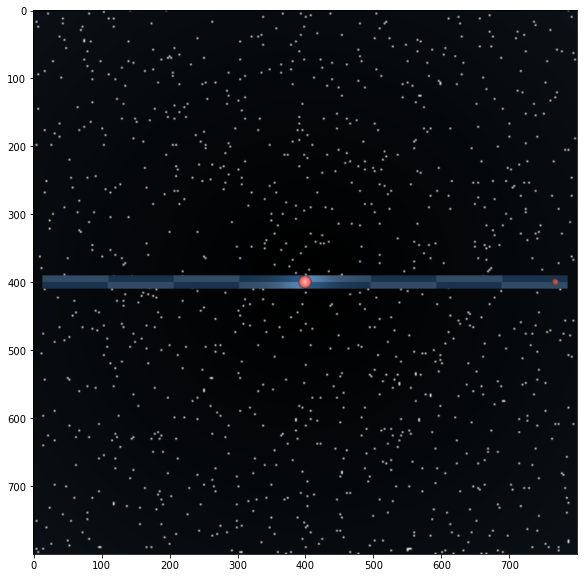

In [10]:
render(physics, camera='fixed')